In [ ]:
%#TODO:

#Try PMA earlier
#Try Best PMA with optical flow
#Try more iterations of XCA (remove threshold)

## View Aligned Projections

In [3]:
pwd

'/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono'

In [1]:
import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, base_path)

from helperFunctions import MoviePlotter
import time
import sys
import tomoDataClass
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift, convert_to_numpy, convert_to_tiff
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt

## PMA Align Test

In [2]:
#Import model data
# numAngles = 800
# shepp3d = tomopy.shepp3d(size=256)
# ang = tomopy.angles(nang=numAngles, ang1=0, ang2=360)
# obj = tomopy.project(shepp3d, ang, pad=False)
# tomo = tomoDataClass.tomoData(obj)
# tomo.center_projections() ## This is needed so that "tomo" knows where the center is
# tomo.jitter(multiplier=10)

tif_file = "/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono/alignedProjections/aligned_manually_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)

obj = obj[:,::2,::2]
print(obj.shape)
tomo = tomoDataClass.tomoData(obj)

tomo.makeNotebookProjMovie()

(800, 360, 550)


Output()

Starting alignment


Cropping projections to size: 550x360: 100%|██████████| 800/800 [00:00<00:00, 1398.61it/s]


Cropping projections to size: 350x260
Finding center of rotation for projections
Original center: 175.0
Center of frame: 175
Aligned projections shifted by 0.0 pixels
Projections are currently centered at pixel 175.0
But it is still offset by 0.0 pixels


PMA Algorithm iterations:   0%|          | 0/1 [00:00<?, ?it/s]

(260, 350)


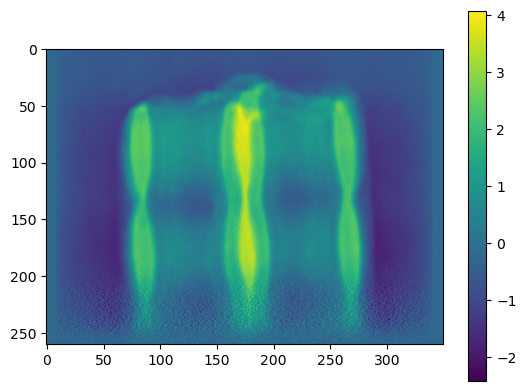

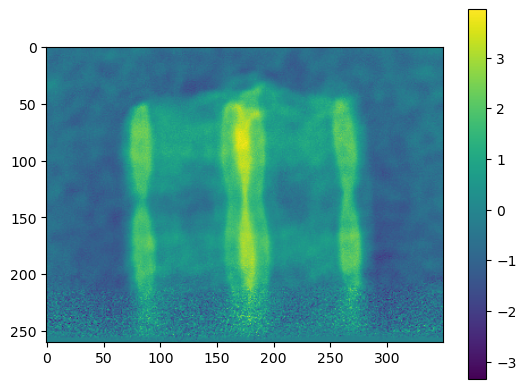



0 0


PMA Algorithm iterations: 100%|██████████| 1/1 [00:41<00:00, 41.39s/it]


Average pixel shift of iteration 0: 0.5117479320470852
Average x shift of iteration 0: 0.51125
Average y shift of iteration 0: 0.0025
Finding center of rotation for projections


Original center: 174.75
Center of frame: 175
Aligned projections shifted by 0.25 pixels
Projections are currently centered at pixel 175.0
But it is still offset by 0.0 pixels
Finding center of rotation for projections
Original center: 175.0
Center of frame: 175
Aligned projections shifted by 0.0 pixels
Projections are currently centered at pixel 175.0
But it is still offset by 0.0 pixels


Apply shifts to final projections: 100%|██████████| 800/800 [00:31<00:00, 25.76it/s]


In [3]:
print("Starting alignment")
# size = 256
# tomo.reset_workingProjections(x_size = size, y_size = size)
tomo.reset_workingProjections(x_size = 550, y_size = 360)
# tomo.PMA(max_iterations = 5, tolerance=0.01, algorithm="gridrec", crop_bottom_center_y = size, crop_bottom_center_x = size)
tomo.PMA(max_iterations = 1, tolerance=0.01, algorithm="gridrec", crop_bottom_center_y = 260, crop_bottom_center_x = 350)
tomo.center_projections()
tomo.make_updates_shift()

In [4]:
tomo.makeNotebookProjMovie()

Output()

## Threshold

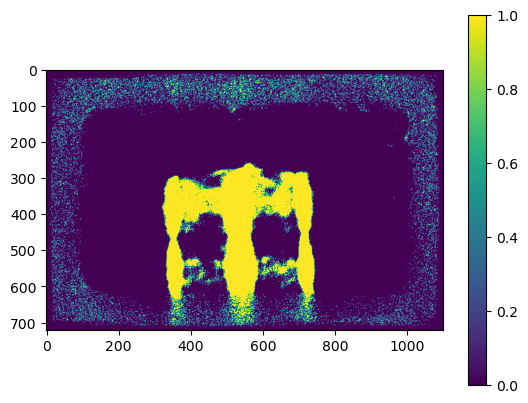

(800, 720, 1100)
(40, 720, 1100)


Cross-Correlation Alignment Iterations:   7%|▋         | 1/15 [00:06<01:34,  6.76s/it]


Average pixel shift of iteration 1: 36.06686754718609



Cross-Correlation Alignment Iterations:  13%|█▎        | 2/15 [00:13<01:27,  6.77s/it]


Average pixel shift of iteration 2: 8.150328691156432



Cross-Correlation Alignment Iterations:  20%|██        | 3/15 [00:20<01:20,  6.67s/it]


Average pixel shift of iteration 3: 2.0



Cross-Correlation Alignment Iterations:  27%|██▋       | 4/15 [00:26<01:12,  6.62s/it]


Average pixel shift of iteration 4: 2.0



Cross-Correlation Alignment Iterations:  33%|███▎      | 5/15 [00:33<01:06,  6.64s/it]


Average pixel shift of iteration 5: 2.0



Cross-Correlation Alignment Iterations:  40%|████      | 6/15 [00:39<00:59,  6.61s/it]


Average pixel shift of iteration 6: 2.0



Cross-Correlation Alignment Iterations:  47%|████▋     | 7/15 [00:46<00:52,  6.59s/it]


Average pixel shift of iteration 7: 2.0



Cross-Correlation Alignment Iterations:  53%|█████▎    | 8/15 [00:53<00:46,  6.60s/it]


Average pixel shift of iteration 8: 2.0



Cross-Correlation Alignment Iterations:  60%|██████    | 9/15 [00:59<00:39,  6.60s/it]


Average pixel shift of iteration 9: 2.0



Cross-Correlation Alignment Iterations:  67%|██████▋   | 10/15 [01:06<00:32,  6.60s/it]


Average pixel shift of iteration 10: 2.0



Cross-Correlation Alignment Iterations:  73%|███████▎  | 11/15 [01:12<00:26,  6.60s/it]


Average pixel shift of iteration 11: 2.0



Cross-Correlation Alignment Iterations:  80%|████████  | 12/15 [01:19<00:19,  6.61s/it]


Average pixel shift of iteration 12: 2.0



Cross-Correlation Alignment Iterations:  87%|████████▋ | 13/15 [01:26<00:13,  6.59s/it]


Average pixel shift of iteration 13: 2.0



Cross-Correlation Alignment Iterations:  93%|█████████▎| 14/15 [01:32<00:06,  6.58s/it]


Average pixel shift of iteration 14: 2.0



Cross-Correlation Alignment Iterations: 100%|██████████| 15/15 [01:39<00:00,  6.61s/it]



Average pixel shift of iteration 15: 2.0
Maximum iterations reached without convergence.


Apply shifts to final projections: 100%|██████████| 40/40 [00:06<00:00,  5.91it/s]


Output()

In [3]:
tif_file = "data/fullTomoReconstructions_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)

plt.imshow(obj[0]<-0.1)
plt.colorbar()
plt.show()

print(obj.shape)
obj = obj[:40,:,:]

print(obj.shape)
tomo = tomoDataClass.tomoData((obj<-0.1).astype(float))
# tomo = tomoDataClass.tomoData(obj)
tomo.reset_workingProjections()
tomo.cross_correlate_align(tolerance=0.5, max_iterations=15)
tomo.make_updates_shift()
tomo.makeNotebookProjMovie()

## Test Optical Flow Algorithm

In [2]:
import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, base_path)

from helperFunctions import MoviePlotter
import time
import sys
import tomoDataClass
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift, convert_to_numpy, convert_to_tiff
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt

In [3]:
#Import model data
# numAngles = 800
# shepp3d = tomopy.shepp3d(size=256)
# ang = tomopy.angles(nang=numAngles, ang1=0, ang2=360)
# obj = tomopy.project(shepp3d, ang, pad=False)
# tomo = tomoDataClass.tomoData(obj)
# tomo.center_projections() ## This is needed so that "tomo" knows where the center is
# tomo.jitter(multiplier=10)

tif_file = "/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono/alignedProjections/aligned_manually_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)

obj = obj[95:125]
print(obj.shape)
tomo = tomoDataClass.tomoData(obj)

tomo.makeNotebookProjMovie()

(30, 720, 1100)


Output()

In [4]:
print("Starting alignment")
# size = 256
# tomo.reset_workingProjections(x_size = size, y_size = size)
tomo.reset_workingProjections(x_size = 550, y_size = 360)

tomo.optical_flow_align()
tomo.center_projections()
tomo.make_updates_shift()

tomo.makeNotebookProjMovie()

Starting alignment


Optical Flow Alignment of Projections: 100%|██████████| 30/30 [01:32<00:00,  3.07s/it]

Finding center of rotation for projections


Original center: 266.75
Center of frame: 275
Aligned projections shifted by 8.25 pixels
Projections are currently centered at pixel 274.75
But it is still offset by 0.25 pixels


Apply shifts to final projections: 100%|██████████| 30/30 [00:01<00:00, 26.69it/s]


Output()